# Rainfall Prediction with Machine Learning

This study presents a set of experiments that involve the use of common machine learning techniques 
to create models that can predict whether it will rain tomorrow or not based on the weather data for that day 
in Madrid.
The dataset can be downloaded from https://www.kaggle.com/datasets/luisvivas/spain-portugal-weather/download

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#https://www.kaggle.com/datasets/luisvivas/spain-portugal-weather/download
data = pd.read_csv("madrid-weather.csv")
data.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2008-07-01,33,17,0.0,14.5,6,6,4,04:32 AM,08:41 PM,...,28,11,5,28,0.0,1014,33,10,203,8
1,2008-07-02,27,17,0.0,14.5,6,6,0,05:36 AM,09:44 PM,...,23,18,22,36,0.0,1012,27,10,215,14
2,2008-07-03,27,14,0.0,14.5,5,5,0,06:50 AM,10:33 PM,...,22,9,8,34,0.0,1015,27,10,269,7
3,2008-07-04,31,13,0.0,14.5,6,6,3,08:08 AM,11:12 PM,...,24,14,5,30,0.0,1016,31,10,156,9
4,2008-07-05,32,18,0.0,14.5,6,6,10,09:26 AM,11:44 PM,...,26,18,5,44,0.0,1015,32,10,256,13


## Data Exploration

In [46]:
data.shape

(3946, 28)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3946 entries, 0 to 3945
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          3946 non-null   object 
 1   maxtempC           3946 non-null   int64  
 2   mintempC           3946 non-null   int64  
 3   totalSnow_cm       3946 non-null   float64
 4   sunHour            3946 non-null   float64
 5   uvIndex            3946 non-null   int64  
 6   uvIndex.1          3946 non-null   int64  
 7   moon_illumination  3946 non-null   int64  
 8   moonrise           3946 non-null   object 
 9   moonset            3946 non-null   object 
 10  sunrise            3946 non-null   object 
 11  sunset             3946 non-null   object 
 12  DewPointC          3946 non-null   int64  
 13  FeelsLikeC         3946 non-null   int64  
 14  HeatIndexC         3946 non-null   int64  
 15  WindChillC         3946 non-null   int64  
 16  WindGustKmph       3946 

Let's create a RainTomorrow column indicating if the precipMM of the next day is more than 0.0. 
Later, we'll use this column as the target to predict

In [63]:
data['precipTomorrow'] = data['precipMM'].shift(-1)
data['RainTomorrow'] = data['precipTomorrow']>0.0
data['RainTomorrow'].replace({False: 0, True: 1},inplace = True)
data.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,precipTomorrow,RainTomorrow
0,2008-07-01,33,17,0.0,14.5,6,6,4,04:32 AM,08:41 PM,...,5,28,0.0,1014,33,10,203,8,0.0,0
1,2008-07-02,27,17,0.0,14.5,6,6,0,05:36 AM,09:44 PM,...,22,36,0.0,1012,27,10,215,14,0.0,0
2,2008-07-03,27,14,0.0,14.5,5,5,0,06:50 AM,10:33 PM,...,8,34,0.0,1015,27,10,269,7,0.0,0
3,2008-07-04,31,13,0.0,14.5,6,6,3,08:08 AM,11:12 PM,...,5,30,0.0,1016,31,10,156,9,0.0,0
4,2008-07-05,32,18,0.0,14.5,6,6,10,09:26 AM,11:44 PM,...,5,44,0.0,1015,32,10,256,13,0.0,0


Check if the dataset is unbalanced or balanced

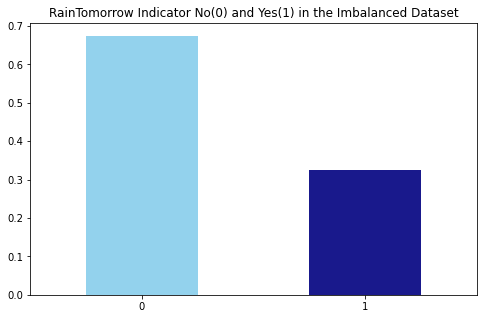

In [64]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
data.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

## Handling Class Imbalance For Rainfall Prediction

There is a class imbalance and we have to deal with it. To fight against the class imbalance, we will use here the oversampling of the minority class. 

In [65]:
data.shape

(3946, 27)

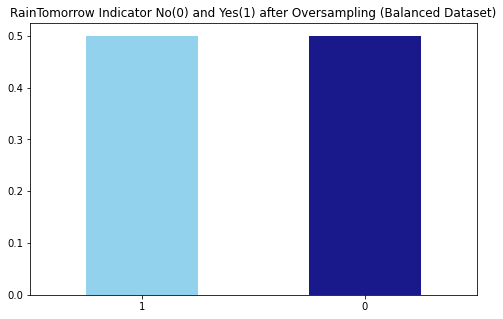

In [66]:
from sklearn.utils import resample

no = data[data.RainTomorrow == 0]
yes = data[data.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

In [67]:
oversampled.shape

(5318, 27)

Moonrise, moonset, sunrise, sunset are categorical columns that do not affect to RainTomorrow, so let's remove them

In [68]:
oversampled.drop(['moonrise', 'moonset', 'sunrise', 'sunset'], axis=1, inplace=True)
oversampled.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,...,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,precipTomorrow,RainTomorrow
0,2008-07-01,33,17,0.0,14.5,6,6,4,6,28,...,5,28,0.0,1014,33,10,203,8,0.0,0
1,2008-07-02,27,17,0.0,14.5,6,6,0,7,23,...,22,36,0.0,1012,27,10,215,14,0.0,0
2,2008-07-03,27,14,0.0,14.5,5,5,0,4,22,...,8,34,0.0,1015,27,10,269,7,0.0,0
3,2008-07-04,31,13,0.0,14.5,6,6,3,4,23,...,5,30,0.0,1016,31,10,156,9,0.0,0
4,2008-07-05,32,18,0.0,14.5,6,6,10,11,26,...,5,44,0.0,1015,32,10,256,13,0.0,0


We are now going to check multicollinearity, that is to say if a feature is strongly correlated with another.

<AxesSubplot:>

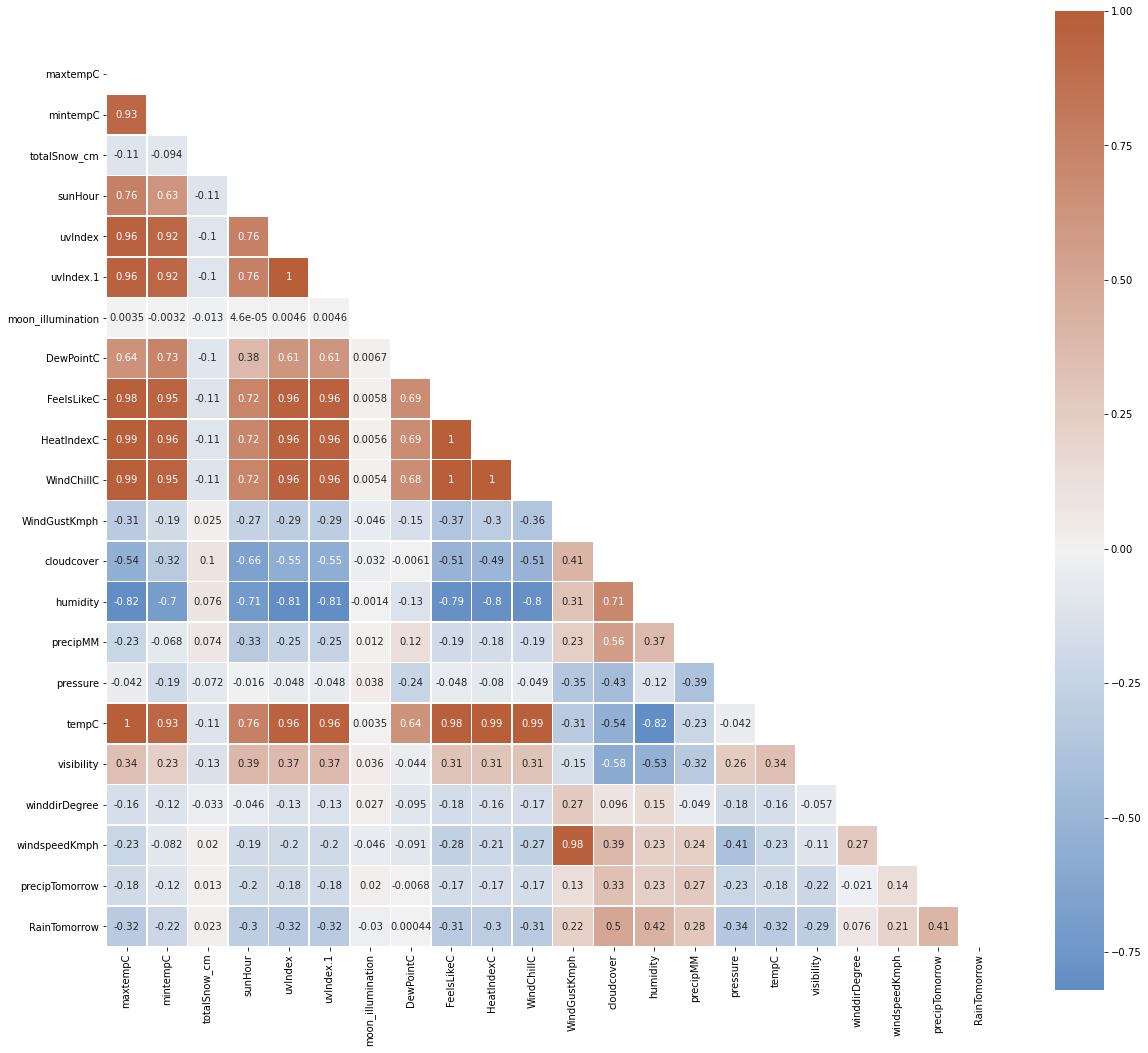

In [69]:
# Correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = oversampled.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

In no case is the correlation value equal to a perfect “1”. We are therefore not removing any functionality

## Training Rainfall Prediction Model with Different Models

We will divide the dataset into training (75%) and test (25%) sets respectively to train the rainfall prediction model. 
For best results, we will standardize our X_train and X_test data

In [51]:
oversampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3355 entries, 0 to 2020
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          3355 non-null   object 
 1   maxtempC           3355 non-null   int64  
 2   mintempC           3355 non-null   int64  
 3   totalSnow_cm       3355 non-null   float64
 4   sunHour            3355 non-null   float64
 5   uvIndex            3355 non-null   int64  
 6   uvIndex.1          3355 non-null   int64  
 7   moon_illumination  3355 non-null   int64  
 8   DewPointC          3355 non-null   int64  
 9   FeelsLikeC         3355 non-null   int64  
 10  HeatIndexC         3355 non-null   int64  
 11  WindChillC         3355 non-null   int64  
 12  WindGustKmph       3355 non-null   int64  
 13  cloudcover         3355 non-null   int64  
 14  humidity           3355 non-null   int64  
 15  precipMM           3355 non-null   float64
 16  pressure           3355 

In [52]:
features = oversampled[['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex', 'uvIndex.1', 'moon_illumination', 
                       'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover', 
                       'humidity', 'precipMM', 'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph']]
target = oversampled['RainTomorrow']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [53]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [54]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, coh_kap, time_taken

Accuracy = 0.7234803337306317
ROC Area under Curve = 0.6344066973717015
Cohen's Kappa = 0.2962630878694973
Time taken = 0.10866832733154297
              precision    recall  f1-score   support

           0    0.75639   0.87784   0.81260       573
           1    0.59770   0.39098   0.47273       266

    accuracy                        0.72348       839
   macro avg    0.67705   0.63441   0.64266       839
weighted avg    0.70608   0.72348   0.70485       839



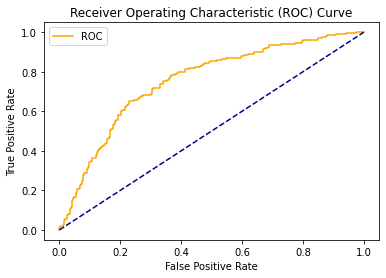

Accuracy = 0.797377830750894
ROC Area under Curve = 0.7952604023146873
Cohen's Kappa = 0.5579310815082972
Time taken = 0.005982637405395508
              precision    recall  f1-score   support

           0    0.89126   0.80105   0.84375       573
           1    0.64815   0.78947   0.71186       266

    accuracy                        0.79738       839
   macro avg    0.76971   0.79526   0.77781       839
weighted avg    0.81418   0.79738   0.80194       839



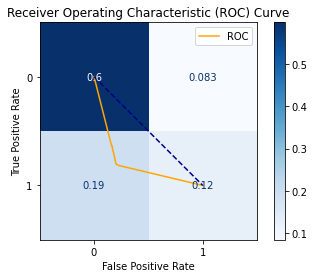

Accuracy = 0.7949940405244339
ROC Area under Curve = 0.7854584104239657
Cohen's Kappa = 0.5466916291810118
Time taken = 2.6093924045562744
              precision    recall  f1-score   support

           0    0.87902   0.81152   0.84392       573
           1    0.65161   0.75940   0.70139       266

    accuracy                        0.79499       839
   macro avg    0.76531   0.78546   0.77265       839
weighted avg    0.80692   0.79499   0.79873       839



C:\Users\ecermc\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


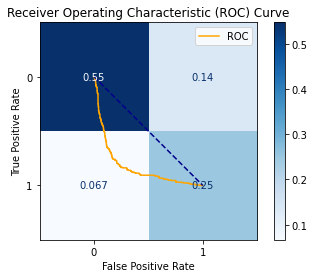

Accuracy = 0.8915375446960667
ROC Area under Curve = 0.87527391777874
Cohen's Kappa = 0.7497927201344943
Time taken = 0.3750014305114746
              precision    recall  f1-score   support

           0    0.92133   0.91972   0.92052       573
           1    0.82772   0.83083   0.82927       266

    accuracy                        0.89154       839
   macro avg    0.87452   0.87527   0.87490       839
weighted avg    0.89165   0.89154   0.89159       839



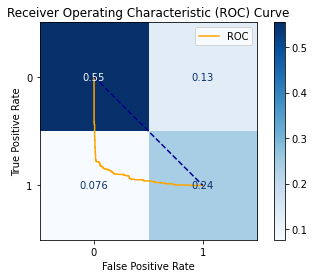

Accuracy = 0.8557806912991657
ROC Area under Curve = 0.8259326326286921
Cohen's Kappa = 0.6618636982856534
Time taken = 0.17549729347229004
              precision    recall  f1-score   support

           0    0.88435   0.90750   0.89578       573
           1    0.78884   0.74436   0.76596       266

    accuracy                        0.85578       839
   macro avg    0.83660   0.82593   0.83087       839
weighted avg    0.85407   0.85578   0.85462       839



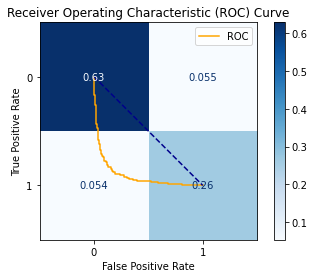

Accuracy = 0.8879618593563766
ROC Area under Curve = 0.87467031452978
Cohen's Kappa = 0.7433516004321623
Time taken = 35.354668617248535
              precision    recall  f1-score   support

           0    0.92389   0.91099   0.91740       573
           1    0.81387   0.83835   0.82593       266

    accuracy                        0.88796       839
   macro avg    0.86888   0.87467   0.87166       839
weighted avg    0.88901   0.88796   0.88840       839



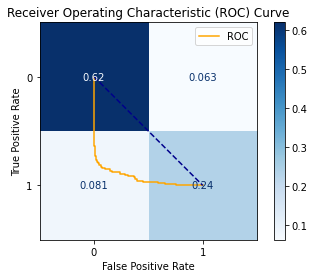

C:\Users\ecermc\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:44:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy = 0.8963051251489869
ROC Area under Curve = 0.8817856158721411
Cohen's Kappa = 0.7612712055652038
Time taken = 1.9418280124664307
              precision    recall  f1-score   support

           0    0.92632   0.92147   0.92388       573
           1    0.83271   0.84211   0.83738       266

    accuracy                        0.89631       839
   macro avg    0.87951   0.88179   0.88063       839
weighted avg    0.89664   0.89631   0.89646       839



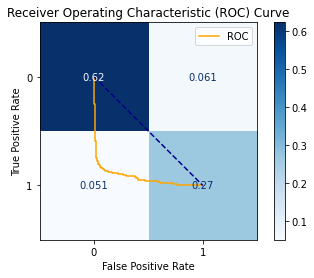

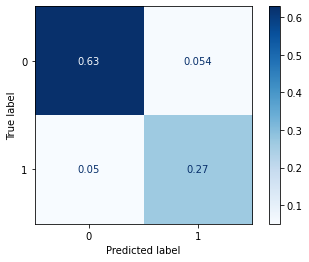

In [56]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

# Neural Network
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 500}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

# Random Forest
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

# Light GBM
import lightgbm as lgb
params_lgb ={'colsample_bytree': 0.95, 
         'max_depth': 16, 
         'min_split_gain': 0.1, 
         'n_estimators': 200, 
         'num_leaves': 50, 
         'reg_alpha': 1.2, 
         'reg_lambda': 1.2, 
         'subsample': 0.95, 
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)

# Catboost
!pip install catboost
import catboost as cb
params_cb ={'iterations': 50,
            'max_depth': 16}

model_cb = cb.CatBoostClassifier(**params_cb)
model_cb, accuracy_cb, roc_auc_cb, coh_kap_cb, tt_cb = run_model(model_cb, X_train, y_train, X_test, y_test, verbose=False)

# XGBoost
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)


## Rainfall Prediction Model Comparison

Now we need to decide which model performed best based on Precision Score, ROC_AUC, Cohen’s Kappa and Total Run Time. 
For a better decision, we chose “Cohen’s Kappa” which is actually an ideal choice as a metric to decide on the best model 
in case of unbalanced datasets. Let’s check which model worked well on which front

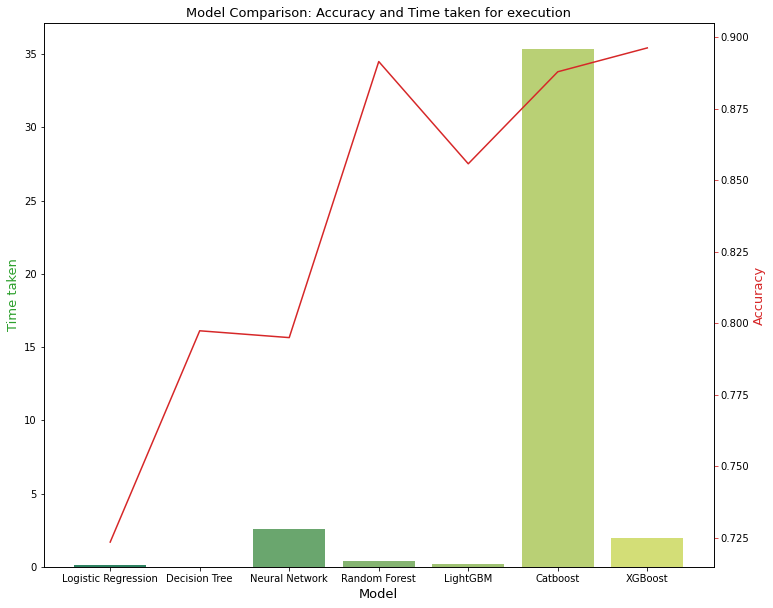

In [58]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_nn, accuracy_rf, accuracy_lgb, accuracy_cb, accuracy_xgb]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_nn, roc_auc_rf, roc_auc_lgb, roc_auc_cb, roc_auc_xgb]
coh_kap_scores = [coh_kap_lr, coh_kap_dt, coh_kap_nn, coh_kap_rf, coh_kap_lgb, coh_kap_cb, coh_kap_xgb]
tt = [tt_lr, tt_dt, tt_nn, tt_rf, tt_lgb, tt_cb, tt_xgb]


model_data = {'Model': ['Logistic Regression','Decision Tree','Neural Network','Random Forest','LightGBM','Catboost','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

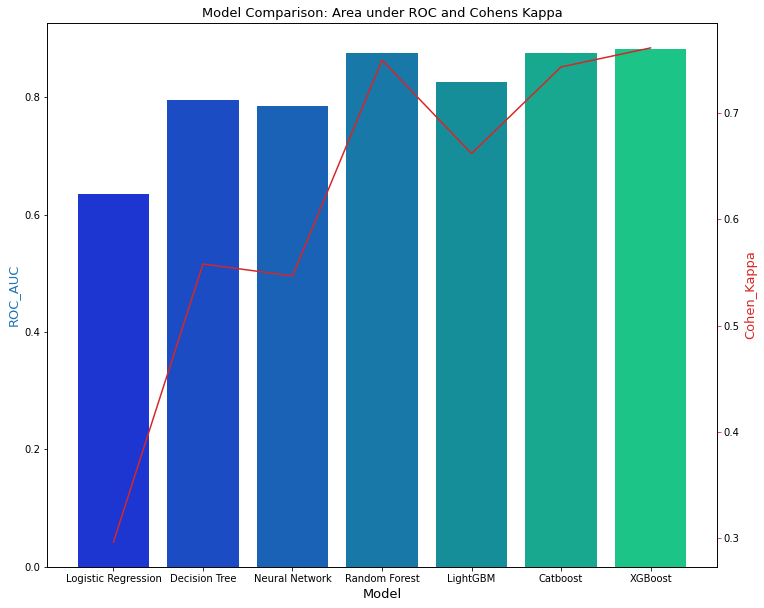

In [59]:
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sns.lineplot(x='Model', y='Cohen_Kappa', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()

We can observe that XGBoost, CatBoost and Random Forest performed better compared to other models. 
However, if speed is an important thing to consider, we can stick with Random Forest instead of XGBoost or CatBoost.